# PROJECT STEPS

<li> Data Collection and Problem Statement</li>
<li> Exploratory Data Analysis with Pandas and NumPy</li>
<li> Data Preparation using Sklearn</li>
<li> Selecting and Training a few Machine Learning Models
<li> Cross-Validation and Hyperparameter Tuning using Sklearn</li>
<li> Deploying the Final Trained Model</li>


# Introduction

- In the following midterm project , We will use the [Hotel booking demand data set](https://www.kaggle.com/jessemostipak/hotel-booking-demand) from Kaggle, to predict whenever a customer's booking will be cancelled or not
  .


This data set contains a single file which compares various booking information between two hotels: a resort hotel(H1), and a city hotel(H2) , comprehending bookings due to arrive between July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. [Article](https://www.sciencedirect.com/science/article/pii/S2352340918315191)


## Task: Predict the possibility of a booking


In [37]:
# importing necessary modules


import pygal
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import gc
import os
import kaleido
plt.style.use(['dark_background','ggplot'])
plt.rcParams['axes.grid'] = False
import subprocess

from subprocess import check_output
import gc

%matplotlib inline


## Downloading the data set


In [2]:
!kaggle datasets download -d jessemostipak/hotel-booking-demand

 80%|██████████████████████████████▍       | 1.00M/1.25M [00:00<00:00, 2.84MB/s]
100%|██████████████████████████████████████| 1.25M/1.25M [00:00<00:00, 3.30MB/s]


In [3]:
# Unziping the data
import zipfile
with zipfile.ZipFile('hotel-booking-demand.zip', 'r') as zip_ref:
    zip_ref.extractall('input')\

os.remove('hotel-booking-demand.zip')

## Reading the data set


In [4]:
df = pd.read_csv('input/hotel_bookings.csv')

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
# checking amount of rows and columns

df.shape

(119390, 32)

## Exploratory Data Analysis with Pandas and NumPy


In [7]:
# checking data types

df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [8]:
df.nunique()  # checking unique values


hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

# Cleaning the Data


In [9]:
df.isnull().sum()  # Null values


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

We can see that the features that present the more amount of NULL values are:

- Company:ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

- Agent:ID of the travel agency that made the booking

- Country:Country of origin. Categories are represented in the ISO 3155–3:2013 format


From the article , the `NULL` values present in the categorical variables of `company` and `agent` should not be considered as missing , rather as "not applicable" meaning that the customer did not come with a traveling agent or company. So we leave them untouched


Answering a few questions with EDA:

- Where do the guests come from? (Country of H1 and H2)
- How much guests come in each month ?
- How likely is for a repeated and non repeated guest to cancel a booking
- Main customers type
- Days in waiting list vs cancellation
- Previous cancellations
- What kind of Market(Type of customer ) is more likely to cancel a booking?


1. Mapping Guests


In [10]:
from collections import Counter

count = Counter(df.country)

In [51]:
count

Counter({'PRT': 48590,
         'GBR': 12129,
         'USA': 2097,
         'ESP': 8568,
         'IRL': 3375,
         'FRA': 10415,
         nan: 488,
         'ROU': 500,
         'NOR': 607,
         'OMN': 18,
         'ARG': 214,
         'POL': 919,
         'DEU': 7287,
         'BEL': 2342,
         'CHE': 1730,
         'CN': 1279,
         'GRC': 128,
         'ITA': 3766,
         'NLD': 2104,
         'DNK': 435,
         'RUS': 632,
         'SWE': 1024,
         'AUS': 426,
         'EST': 83,
         'CZE': 171,
         'BRA': 2224,
         'FIN': 447,
         'MOZ': 67,
         'BWA': 1,
         'LUX': 287,
         'SVN': 57,
         'ALB': 12,
         'IND': 152,
         'CHN': 999,
         'MEX': 85,
         'MAR': 259,
         'UKR': 68,
         'SMR': 1,
         'LVA': 55,
         'PRI': 12,
         'SRB': 101,
         'CHL': 65,
         'AUT': 1263,
         'BLR': 26,
         'LTU': 81,
         'TUR': 248,
         'ZAF': 80,
         'AGO':

In [52]:
df_resort = df.loc[df.hotel == 'Resort Hotel']  # pick members from H1


In [53]:
import matplotlib.image as img


def show_country_map(country):
    c = Counter(country)
    country = pd.DataFrame.from_records(list(dict(c).items()),
                                        columns=['country', 'count'])
    total_guests = country["count"].sum()
    country["Guests in %"] = round(country["count"] / total_guests * 100, 2)
    guest_map = px.choropleth(
        country,
        locations=country.country,
        color=country["Guests in %"],
        hover_name=country.country,
        color_continuous_scale=px.colors.sequential.Inferno,
        title="Home country of Guests ")
    guest_map.write_image("map.png", width=1280, height=720)
    im = img.imread('map.png')
    # show image
    fig = plt.gcf()
    fig.set_size_inches(20, 20)
    plt.imshow(im)


In [54]:
def plot_pie(country):
    c = Counter(country).most_common(10)


    country = pd.DataFrame.from_records(list(dict(c).items()),
                                        columns=['country', 'count'])
    plt.pie(
        country["count"],
        labels=country["country"],
        autopct='%1.1f%%',
        shadow=True,
        startangle=140,
    )

    plt.title("Top 10 Home country of Guests")
    fig = plt.gcf()
    fig.set_size_inches(8, 8)
    plt.show()

In [55]:
df.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

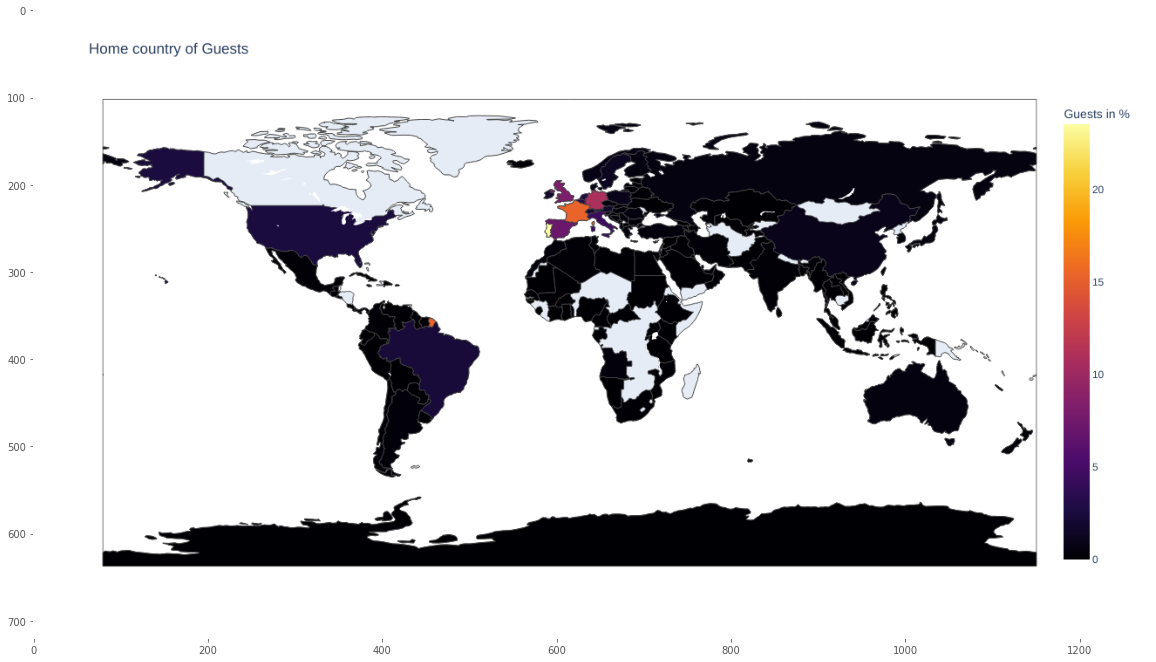

In [56]:
# For H1

df_city = df.loc[df.hotel == 'City Hotel']

show_country_map(df_city.loc[df_city.is_canceled == 0].country)


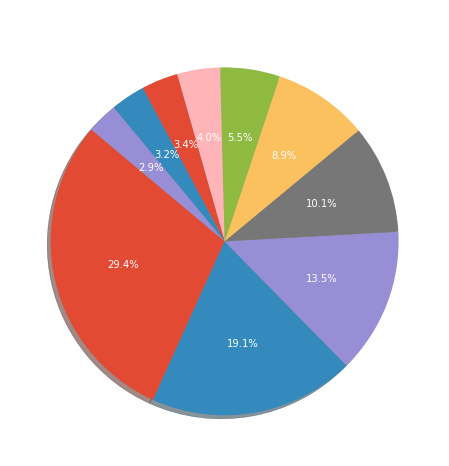

In [57]:
plot_pie(df_city.loc[df_city.is_canceled == 0].country)


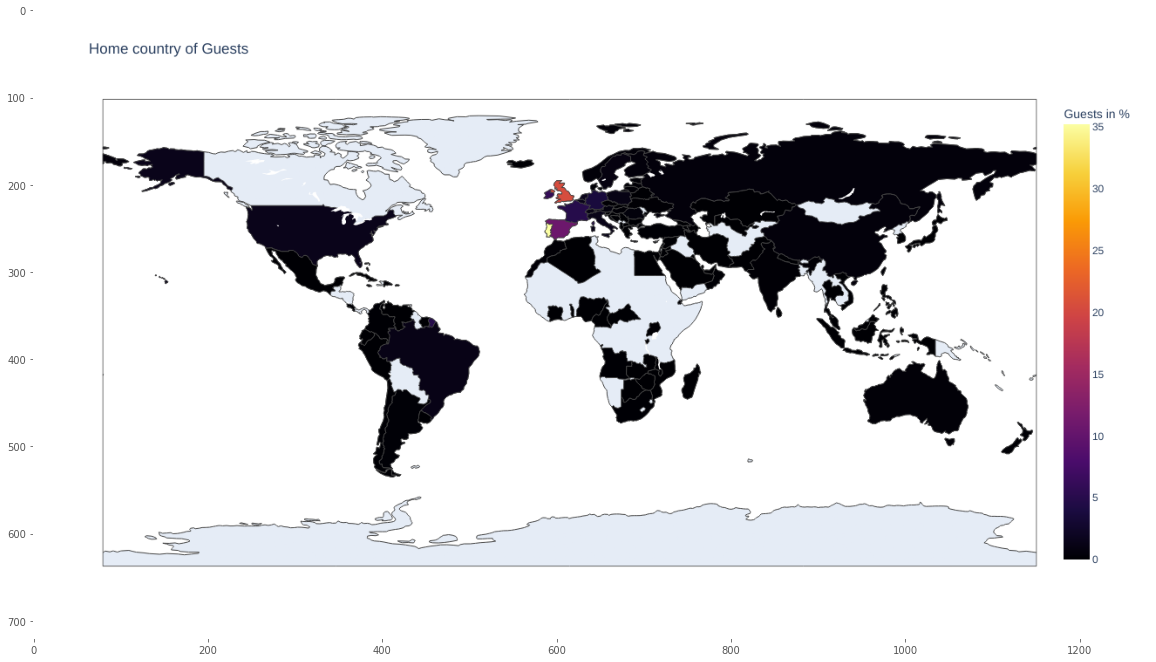

In [58]:
# For H2

df_resort = df.loc[df.hotel == 'Resort Hotel']

show_country_map(df_resort.loc[df_resort.is_canceled == 0].country)


# Cancellations by country

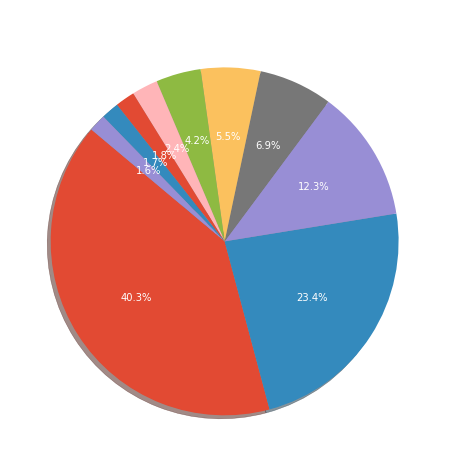

In [59]:
# plot top 10 country of guests
plot_pie(df_resort.loc[df_resort.is_canceled == 0].country)


## Cancellations for each hotel type


<AxesSubplot:title={'center':'For city hotel'}, ylabel='is_canceled'>

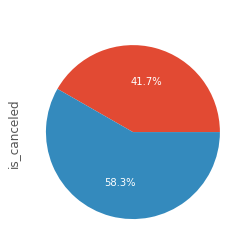

In [60]:
labels = 'yes', 'no'

df_city.is_canceled.value_counts().sort_values().plot.pie(
    labels=labels, autopct='%1.1f%%', title='For city hotel')


<AxesSubplot:title={'center':'For resort Hotel'}, ylabel='is_canceled'>

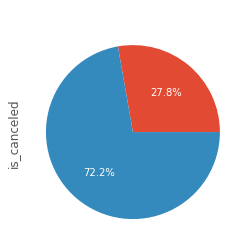

In [61]:
df_resort.is_canceled.value_counts().sort_values().plot.pie(
    labels=labels, autopct='%1.1f%%', title='For resort Hotel')


## How much guests come each month ?


<AxesSubplot:>

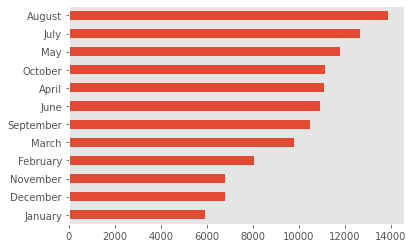

In [62]:
df.arrival_date_month.value_counts().sort_values().plot.barh()


<AxesSubplot:>

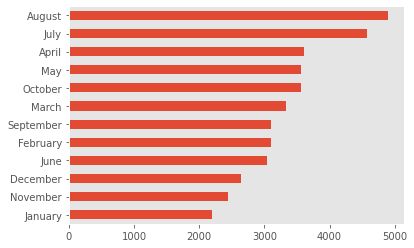

In [63]:
df_resort.arrival_date_month.value_counts().sort_values().plot.barh()


## How likely is for a repeating customer to cancel a booking


In [64]:
df_repeating = df.loc[df.is_repeated_guest == 1]
df_non_repeating = df.loc[df.is_repeated_guest == 0]

Text(0.5, 1.0, 'Returning Customers canceling bookings ')

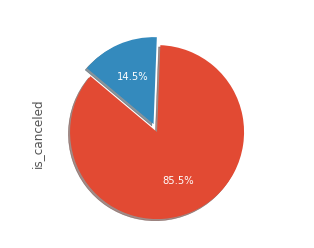

In [65]:
labels = ['no', 'yes']
# explode 2nd slice
explode = (0, 0.1)

df_repeating.is_canceled.value_counts().plot(kind='pie',
                                             labels=labels,
                                             autopct='%1.1f%%',
                                             shadow=True,
                                             startangle=140,
                                             explode=explode)
plt.title("Returning Customers canceling bookings ")


Text(0.5, 1.0, 'Non Returning Customers canceling bookings ')

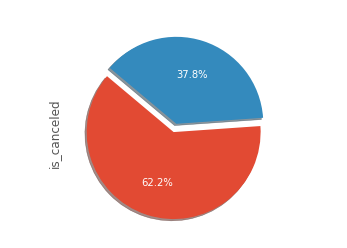

In [66]:
labels = ['no', 'yes']
# explode 2nd slice
explode = (0, 0.1)

df_non_repeating.is_canceled.value_counts().plot(kind='pie',
                                                 labels=labels,
                                                 autopct='%1.1f%%',
                                                 shadow=True,
                                                 startangle=140,
                                                 explode=explode)
plt.title("Non Returning Customers canceling bookings ")

We can see a slight variation comparing returning customers to non returning customers, with the latter being more likely to cancel a booking.


# Feature Selection


## Mutual Information


In [11]:
# filling missing values
df['country'] = df['country'].fillna('NA')
df['children'] = df['children'].fillna(0)

# filling with 0 and converting to int

df['agent'] = df['agent'].fillna(0).astype(int)  # Maybe convert to 1 and 0
df['company'] = df['company'].fillna(0).astype(int)


In [12]:
# creating numerical and categorial variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numerical = df.select_dtypes(include=numerics).columns.tolist()

category = ['object']

categorical = df.select_dtypes(include=category).columns.tolist()

In [13]:
print("Initial categorical Features:",categorical)


Initial categorical Features: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


In [14]:

print("Initial numerical Features:" ,numerical)

Initial numerical Features: ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


<AxesSubplot:ylabel='customer_type'>

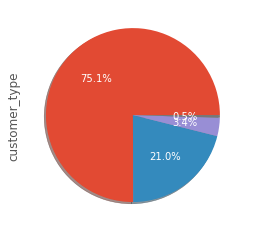

In [15]:
# Main type of customers
df.customer_type.value_counts().plot(kind="pie",
                                     autopct='%1.1f%%',
                                     shadow=True)


We can see that Transient represents the majority of customers, that is , customers that are not part of any group or contract


We will calculate the mutual information between the variables X (categorical ) and target y.


In [72]:
def mutual_info_categorical(series):
    return mutual_info_score(series, df.is_canceled)

<AxesSubplot:>

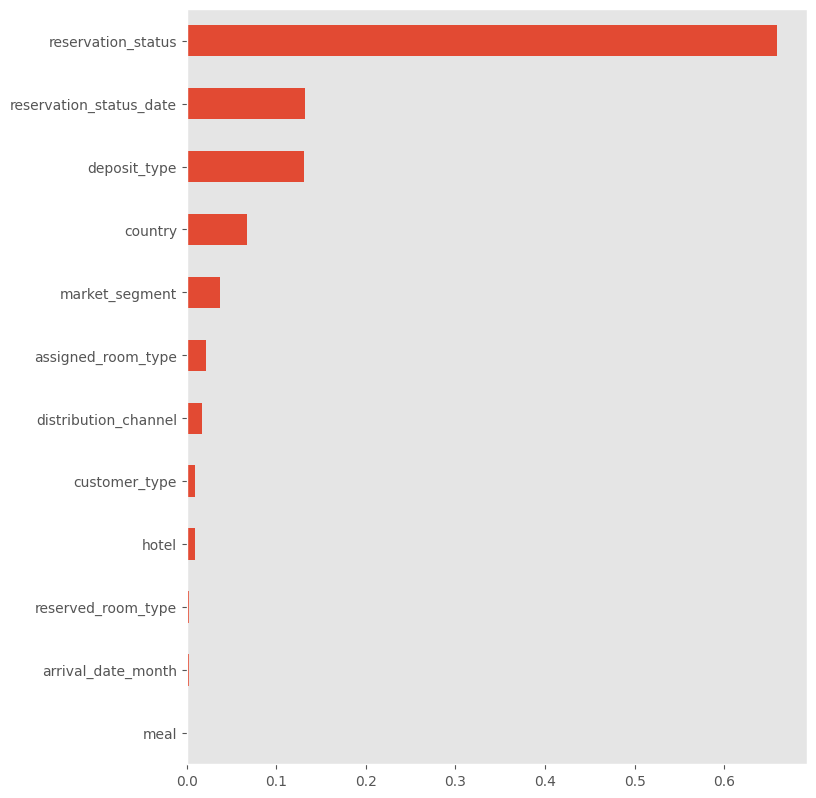

In [73]:
from matplotlib.pyplot import figure
from sklearn.metrics import mutual_info_score

mi = df[categorical].apply(mutual_info_categorical)
figure(figsize=(8, 10), dpi=100)
mi.sort_values(ascending=True).plot(kind='barh')


We can see that the 3 most important features are `reservation_status` , `reservation_status_date` and `deposit_type`


However ,to avoid over-fitting and data leakage , it would be better to drop the `reservation_status` variable


---


## Reservation Status vs Actual cancellations


Reservation_status : Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why


In [16]:
df.reservation_status.value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [17]:
df.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

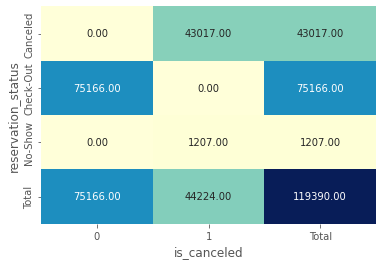

In [18]:
tab = pd.crosstab(columns=df['reservation_status'],
                  index=df['is_canceled'],
                  margins=True,
                  margins_name='Total')

res = sns.heatmap(tab.T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=False)

plt.savefig("crosstab_pandas.png", bbox_inches='tight', dpi=100)

plt.show()

We can clearly see how this variable is affecting the result and may cause data leakage, so we will exclude it along with `reservation_status_date`


In [77]:
#df = df.drop(['reservation_status', 'reservation_status_date'], axis=1)


In [19]:
categorical.remove('reservation_status')
categorical.remove('reservation_status_date')

<AxesSubplot:>

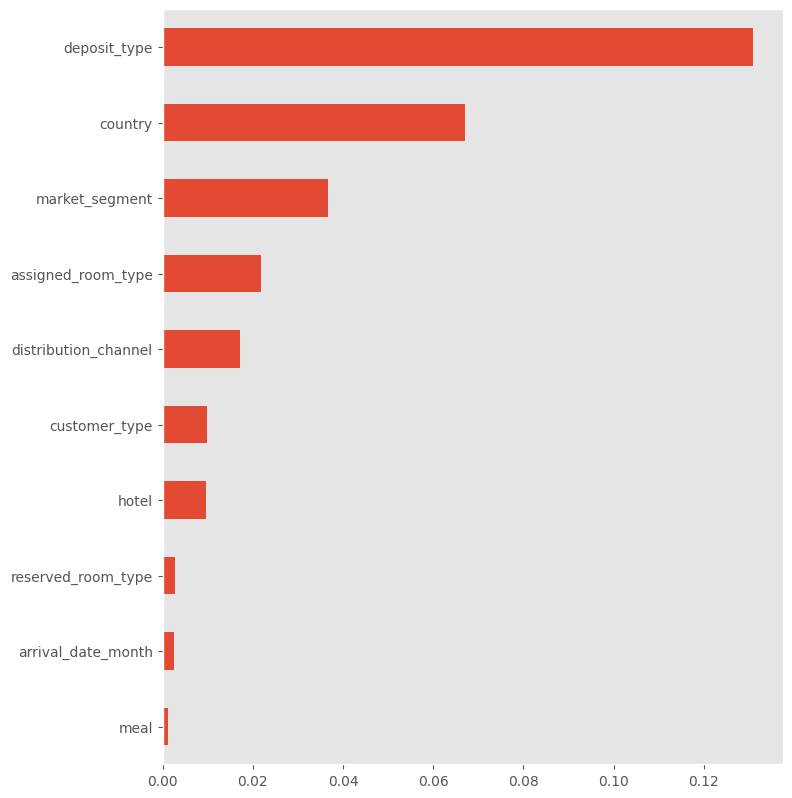

In [79]:
from matplotlib.pyplot import figure
from sklearn.metrics import mutual_info_score

mi = df[categorical].apply(mutual_info_categorical)
figure(figsize=(8, 10), dpi=100)
mi.sort_values(ascending=True).plot(kind='barh')


In [80]:
mi.sort_values(ascending=False)

deposit_type            0.130952
country                 0.067132
market_segment          0.036687
assigned_room_type      0.021782
distribution_channel    0.017106
customer_type           0.009796
hotel                   0.009541
reserved_room_type      0.002776
arrival_date_month      0.002489
meal                    0.001264
dtype: float64

We also want to make our model to be as <i> general </i> as possible, as well as preventing the model to be biased towards determined countries , so we will exclude `country` . Furthermore, according to the article , it is also possible that the hotel may not know the correct nationality of the customer until the catual moment of check-in.

In [20]:
categorical.remove('country')

# Pearson Correlation


- Checking correlation between variables so we can know what variables we can drop , to avoid over fitting


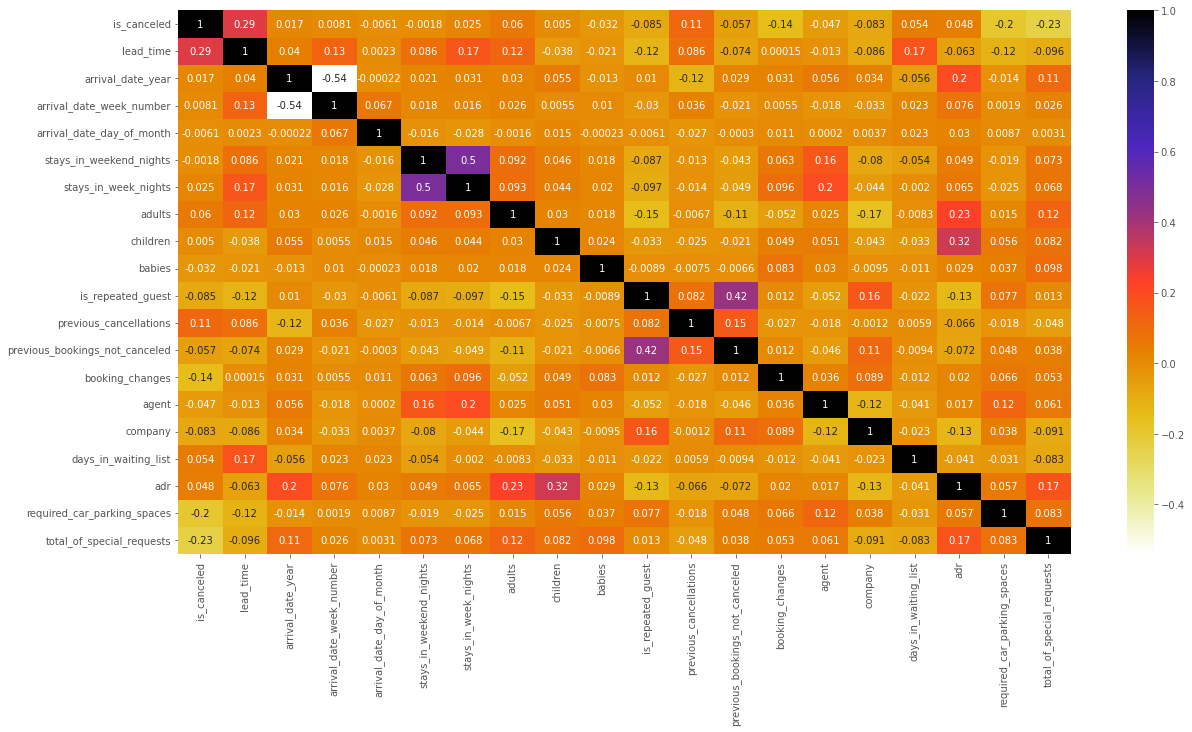

In [82]:
import seaborn as sns
# Using pearson correlation
plt.figure(figsize=(20, 10))
corr = df[numerical].corr(method='pearson')
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

Arrival date_week_number  has barely any impact on the target variable $(0.008)$ , so we will remove it

<AxesSubplot:ylabel='customer_type'>

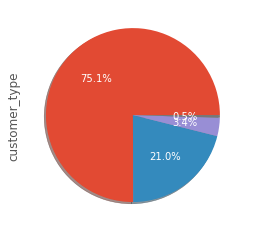

In [83]:
# Main type of customers
df.customer_type.value_counts().plot(kind="pie",
                                     autopct='%1.1f%%',
                                     shadow=True)


In [84]:
# import calendar
# df.arrival_date_year = df.arrival_date_year.map(str)
# df.arrival_date_day_of_month = df.arrival_date_day_of_month.map(str) # to string
# df['arrival_date_month'] = df['arrival_date_month'].str[0:3]
# df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: list(calendar.month_abbr).index(x)) # converting months to month numbers
# df['arrival_date_month'] = df['arrival_date_month'].map(str)

# df['arrival_date'] = df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].agg('-'.join, axis=1)

# df['arrival_date'] = pd.to_datetime(df['arrival_date'],
#  format = '%Y-%m-%d',
#  errors = 'coerce')

# df = df.drop(df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']], 1)

# <b> Categorical Variables: </b>

## Deposit_type 

Deposit type indicates whenever a customer made a deposit to guarantee their booking , we will examine this feature in further detail.

In [85]:
from numpy import mean

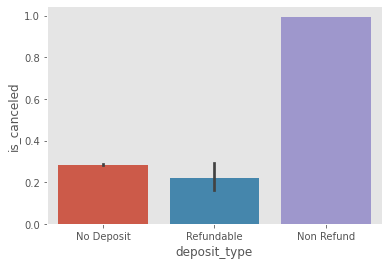

In [86]:
deposit_plot = sns.barplot(x="deposit_type",y="is_canceled",data=df,estimator=mean)

We can see an overwhelming majority of people that choose `non refund` decided to cancel their booking , however we may check that this type of variable does not represent the majority of customers, lets see.

In [87]:
groups = df.groupby('deposit_type')['is_canceled'].count()
groups

deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: is_canceled, dtype: int64

In [88]:
df.groupby('deposit_type')['is_canceled'].mean()

deposit_type
No Deposit    0.283770
Non Refund    0.993624
Refundable    0.222222
Name: is_canceled, dtype: float64

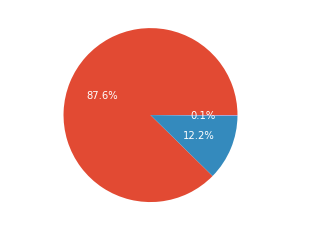

In [89]:
labels=['No Deposit','Non Refund','Refundable']

plt.pie(x=groups,autopct='%1.1f%%',labels=labels);

 `Non refund` customers barely represents 12.2% of the actual data , furthermore ,`Non refund` has a very high value of canceled ratio (almost $100\%$) but its volume is way less compared to the other type of deposits,so, to avoid making wrong assumptions  we will drop this one as well.

In [21]:
categorical.remove('deposit_type')

## Customer_type counts and actual cancellations  

In [22]:
customer = df.groupby('customer_type')['is_canceled'].count()
customer

customer_type
Contract            4076
Group                577
Transient          89613
Transient-Party    25124
Name: is_canceled, dtype: int64

<AxesSubplot:xlabel='customer_type', ylabel='is_canceled'>

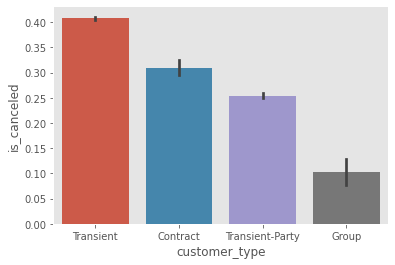

In [92]:
sns.barplot(x="customer_type",y="is_canceled",data=df,estimator=mean)

Transient has enough volume of data, so this feature should be included .

## Reserved Room Type

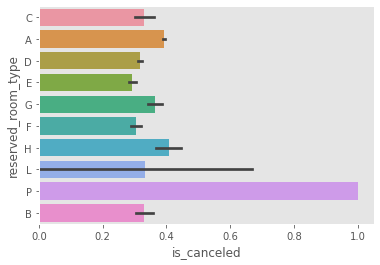

In [93]:
reserved = sns.barplot(y='reserved_room_type',x='is_canceled',data=df,estimator=mean,)

In [94]:
df.groupby('reserved_room_type')['is_canceled'].mean()

reserved_room_type
A    0.391074
B    0.329159
C    0.330472
D    0.317796
E    0.292884
F    0.303763
G    0.364374
H    0.407654
L    0.333333
P    1.000000
Name: is_canceled, dtype: float64

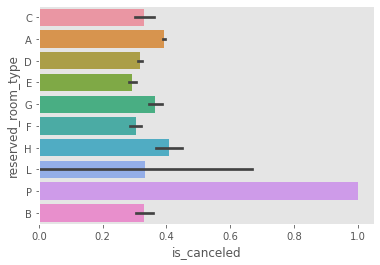

In [95]:
reserved = sns.barplot(y='reserved_room_type',x='is_canceled',data=df,estimator=mean,)

$100 \%$ of people that chose `reserved_room_type` "P" canceled the booking , however , it will be good to verify what amount of the population this group represents.

In [96]:
df['reserved_room_type'].value_counts(normalize=True)* 100

A    72.027808
D    16.082586
E     5.473658
F     2.426501
G     1.753916
B     0.936427
C     0.780635
H     0.503392
P     0.010051
L     0.005026
Name: reserved_room_type, dtype: float64

`reserved_room_type` P represents a measly 0.01 percent of the entire customers but has a  really high cancellation rate , we also see that other rooms are very close to one another in respect to cancellations , we should exclude this feature , given that P has not enough volume of data to back it up

In [39]:
categorical.remove('reserved_room_type')

ValueError: list.remove(x): x not in list

## Assigned_room_type

In [38]:
assigned  = sns.barplot(y='assigned_room_type', x='is_canceled',data=df,estimator=mean,)

NameError: name 'mean' is not defined

In [99]:
df.groupby('assigned_room_type')['is_canceled'].mean()

assigned_room_type
A    0.444925
B    0.236708
C    0.187789
D    0.251244
E    0.252114
F    0.247134
G    0.305523
H    0.352528
I    0.013774
K    0.043011
L    1.000000
P    1.000000
Name: is_canceled, dtype: float64

In [100]:
df['assigned_room_type'].value_counts(normalize=True)* 100

A    62.026133
D    21.209482
E     6.538236
F     3.141804
G     2.138370
C     1.989279
B     1.811710
H     0.596365
I     0.304046
K     0.233688
P     0.010051
L     0.000838
Name: assigned_room_type, dtype: float64

We can see the exact same deal happens with the assigned_room_type , where L and P have a astonishingly high cancellation but barely any data to back it up, so it should also be excluded .

In [24]:
categorical.remove('assigned_room_type')

## <b> Numerical  </b>

### Lead_time :Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

In [25]:
df['lead_time'].value_counts()

0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
400       1
370       1
532       1
371       1
463       1
Name: lead_time, Length: 479, dtype: int64

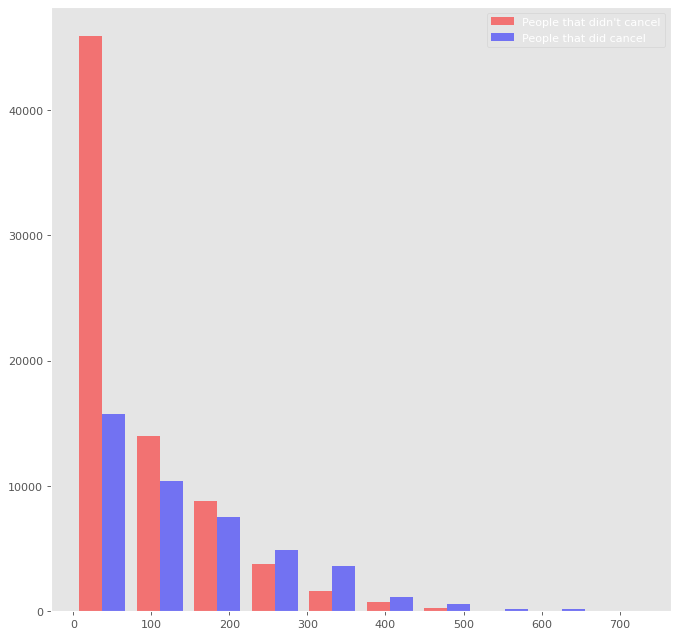

In [103]:
figure(figsize=(10, 10), dpi=80)


x= df.loc[df["is_canceled"]==0]['lead_time']
y=df.loc[df["is_canceled"]==1]['lead_time']

labels= ["People that didn't cancel",'People that did cancel']


plt.hist([x, y], color=['r','b'], alpha=0.5);
plt.legend(labels=labels);


We see a  variation in the graph, there is a high disproportion of values for  People that didn't cancel and people who did between the range of 0 to 100 days, but after that it gets a bit more even, until 200+ days where people that cancelled take the lead .

##  Removing the target variable from numerical

In [26]:
numerical.remove('is_canceled')

## Final features to include 

In [40]:
display(categorical)

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'customer_type']

In [41]:
display(numerical)

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

# Setting up validation framework


In [29]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2)
df_train, df_val = train_test_split(df_full_train, test_size=0.25)


In [30]:
len(df_train), len(df_val), len(df_test)


(71634, 23878, 23878)

In [31]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.is_canceled.values
y_val = df_val.is_canceled.values
y_test = df_test.is_canceled.values


In [32]:

del df_train['is_canceled']
del df_val['is_canceled']
del df_test['is_canceled']


## Feature selection | Feature Importance


What features to delete ?


In [42]:
df_full_train = df_full_train.reset_index(drop=True)


<AxesSubplot:ylabel='is_canceled'>

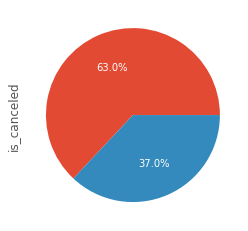

In [43]:
labels = "no", "yes"
df_full_train.is_canceled.value_counts(normalize=True).plot(kind="pie",
                                                            autopct='%1.1f%%',
                                                            labels=labels)


In [113]:
df[categorical].dtypes

hotel                   object
arrival_date_month      object
meal                    object
market_segment          object
distribution_channel    object
customer_type           object
dtype: object

## Numerical features


In [44]:
correlation = df_full_train.corr()['is_canceled'].abs().sort_values(
    ascending=True)
figure(figsize=(8, 10), dpi=100)
correlation.iloc[:-1].plot(kind='barh')


NameError: name 'figure' is not defined

We get that the most important features are `lead_time`(Number of days elapsed between entering day of the booking and arrival ), `total_of_special_requests` ,`agent` and `required_car_parking_spaces`


# One hot encoding


In [115]:
df_full_train[categorical].head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,customer_type
0,City Hotel,October,BB,Offline TA/TO,TA/TO,Transient-Party
1,City Hotel,September,BB,Online TA,TA/TO,Transient
2,City Hotel,August,SC,Online TA,TA/TO,Transient
3,City Hotel,August,BB,Online TA,TA/TO,Transient-Party
4,Resort Hotel,August,BB,Direct,Direct,Transient


In [48]:
# Using sklearn to encode the categorical features

from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [117]:
dv.get_feature_names()


/home/elegant00/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['adr',
 'adults',
 'agent',
 'arrival_date_day_of_month',
 'arrival_date_month=April',
 'arrival_date_month=August',
 'arrival_date_month=December',
 'arrival_date_month=February',
 'arrival_date_month=January',
 'arrival_date_month=July',
 'arrival_date_month=June',
 'arrival_date_month=March',
 'arrival_date_month=May',
 'arrival_date_month=November',
 'arrival_date_month=October',
 'arrival_date_month=September',
 'arrival_date_week_number',
 'arrival_date_year',
 'babies',
 'booking_changes',
 'children',
 'company',
 'customer_type=Contract',
 'customer_type=Group',
 'customer_type=Transient',
 'customer_type=Transient-Party',
 'days_in_waiting_list',
 'distribution_channel=Corporate',
 'distribution_channel=Direct',
 'distribution_channel=GDS',
 'distribution_channel=TA/TO',
 'distribution_channel=Undefined',
 'hotel=City Hotel',
 'hotel=Resort Hotel',
 'is_repeated_guest',
 'lead_time',
 'market_segment=Aviation',
 'market_segment=Complementary',
 'market_segment=Corporate',
 '

# Training logistic regression with Scikit-Learn


In [118]:
from sklearn.linear_model import LogisticRegression


In [119]:
classifier = LogisticRegression(random_state=0, max_iter=1000)
classifier.fit(X_train, y_train)

/home/elegant00/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=1000, random_state=0)

In [53]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')


In [54]:
X_test = dv.transform(dicts_test)


In [122]:
y_pred_lr = classifier.predict(X_test)


In [123]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_lr)
cm


array([[13422,  1665],
       [ 3546,  5245]])

In [124]:
from sklearn.metrics import accuracy_score

lr_score = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy Score of Logistic Regression: {lr_score}")


Accuracy Score of Logistic Regression: 0.781765642013569


Checking the Precision and recall value


In [125]:
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")


Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.89      0.84     15087
           1       0.76      0.60      0.67      8791

    accuracy                           0.78     23878
   macro avg       0.78      0.74      0.75     23878
weighted avg       0.78      0.78      0.78     23878



## AUC Curve of Logistic Regression


In [126]:
from sklearn import metrics


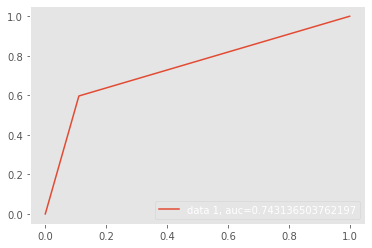

In [127]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_lr)
auc = metrics.roc_auc_score(y_test, y_pred_lr)
plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))
plt.legend(loc=4)
plt.show()


## Test 1 customer


In [128]:
customer = dicts_test[-40]


In [129]:
X_small = dv.transform([customer])
classifier.predict_proba(X_small)[0, 1]


0.6127915249534276

In [130]:
y_test[-40]


0

# Decision tree classifier


In [131]:
from sklearn import tree

In [132]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print(dtc.get_params())  # default parameters of decision tree classifier


{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [133]:
y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
print(f"Accuracy Score of Decision Tree (test dataset) is : {acc_dtc}")


Accuracy Score of Decision Tree (test dataset) is : 0.8154786833068096


In [134]:
y_pred_dtc = dtc.predict(X_val)

acc_dtc = accuracy_score(y_val, y_pred_dtc)
print(f"Accuracy Score of Decision Tree (validation dataset) is : {acc_dtc}")

Accuracy Score of Decision Tree (validation dataset) is : 0.8142641762291649


In [135]:
import graphviz

/home/elegant00/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



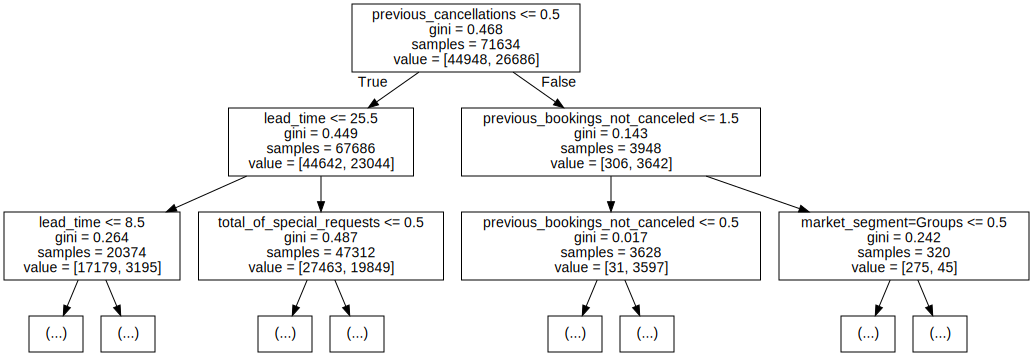

In [136]:
display(
    graphviz.Source(
        tree.export_graphviz(dtc,
                             feature_names=dv.get_feature_names(),
                             max_depth=2)), )


## Parameter tunning of Decision Tree


In [56]:
from sklearn.metrics import roc_auc_score

In [138]:
# selecting a max_depth

numbers = [1, 2, 3, 4, 5, 6, 10, 15, 20, 30, None]

for d in numbers:
    dtc = tree.DecisionTreeClassifier(max_depth=d)

    dtc.fit(X_train, y_train)

    y_pred_dtc = dtc.predict(X_test)

    auc = accuracy_score(y_test, y_pred_dtc)

    print(" %4s -> %.3f " % (d, auc))


    1 -> 0.674 
    2 -> 0.677 
    3 -> 0.708 
    4 -> 0.765 
    5 -> 0.765 
    6 -> 0.773 
   10 -> 0.803 
   15 -> 0.823 
   20 -> 0.824 
   30 -> 0.820 
 None -> 0.815 


Growth seem to stop around max_depth [10,20]


In [139]:
# Now lets test the scores changing the amount of leafs

scores = []

for depth in [10, 15, 20]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:

        dt = tree.DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)

        dt.fit(X_train, y_train)

        y_pred_dtc = dt.predict(X_test)

        auc = accuracy_score(y_test, y_pred_dtc)

        scores.append((depth, s, auc))


<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

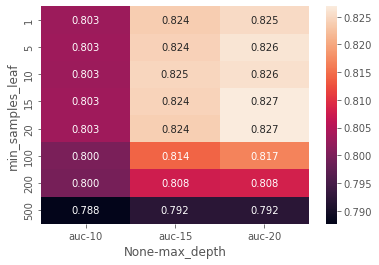

In [140]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores_pivot = df_scores.pivot(index='min_samples_leaf',
                                  columns=['max_depth'],
                                  values=['auc'])
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")


The best score seems to be at min_samples_leaf = 1 and max_depth of 20


In [141]:
dtc = tree.DecisionTreeClassifier(max_depth=20, min_samples_leaf=1)
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
print(f"Accuracy Score of Decision Tree (test dataset) is : {acc_dtc}")

Accuracy Score of Decision Tree (test dataset) is : 0.8246503057207472


In [142]:
dtc = tree.DecisionTreeClassifier(max_depth=15, min_samples_leaf=1)
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_val)

acc_dtc = accuracy_score(y_val, y_pred_dtc)
print(f"Accuracy Score of Decision Tree (Validation dataset) is : {acc_dtc}")

Accuracy Score of Decision Tree (Validation dataset) is : 0.826032331015998


# Random Forest


In [143]:
from sklearn.ensemble import RandomForestClassifier

Rf_model = RandomForestClassifier(n_estimators=20)
Rf_model.fit(X_train, y_train)
display(Rf_model.get_params())  # default_parameters of the random forest model


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [144]:
y_pred_dtc = Rf_model.predict(X_val)

acc_dtc = accuracy_score(y_val, y_pred_dtc)
print(
    f"Accuracy Score of Random Forest Classifier (Validation dataset) is : {acc_dtc}. \n"
)

print("------------ Confussion Matrix --------------- \n")
print(confusion_matrix(y_test, y_pred_dtc))

roc_rf = roc_auc_score(y_val, y_pred_dtc)
print(f"Roc auc score : {roc_rf}")

Accuracy Score of Random Forest Classifier (Validation dataset) is : 0.8580283105787755. 

------------ Confussion Matrix --------------- 

[[10410  4677]
 [ 5997  2794]]
Roc auc score : 0.8317116979454089


Let's now do parameter tunning of the random forest model


In [145]:
print(f'Train Accuracy - : {Rf_model.score(X_train,y_train):.3f}')
print(f'Test Accuracy - : {Rf_model.score(X_test,y_test):.3f}')


Train Accuracy - : 0.989
Test Accuracy - : 0.859


The score for train is quite big , it may be overfitting


### Feature Importance within the Random Forest


In [146]:
importances = Rf_model.feature_importances_

#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(df_train.columns)

#create a list of tuples
feature_importance = sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df_imp = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance = list(df_imp['importance'])
feature = list(df_imp['feature'])

#see df
print(df_imp)


    importance                         feature
0     0.105575                           hotel
1     0.072162              arrival_date_month
2     0.057551          previous_cancellations
3     0.052901               arrival_date_year
4     0.029803              assigned_room_type
5     0.028560                   customer_type
6     0.021436  previous_bookings_not_canceled
7     0.020738            days_in_waiting_list
8     0.019224                       lead_time
9     0.010785         reservation_status_date
10    0.009127                             adr
11    0.008983                 booking_changes
12    0.006846                    deposit_type
13    0.006296       total_of_special_requests
14    0.006093                        children
15    0.005893       arrival_date_day_of_month
16    0.005376                          babies
17    0.005254                         country
18    0.004666        arrival_date_week_number
19    0.004203                            meal
20    0.00402

## Parameter tunning of Random Forest | Grid SearchCV


- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is - split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)


In [147]:
from sklearn.model_selection import GridSearchCV


In [148]:
param_grid = {
    "max_depth": [10, 13],
    "n_estimators": [10, 100],
    "min_samples_split": [2, 5]
}


In [149]:
display(param_grid)

{'max_depth': [10, 13], 'n_estimators': [10, 100], 'min_samples_split': [2, 5]}

---

**NOTE**

(This may take a while)

---


In [150]:
rf = RandomForestClassifier()

rf_grid = GridSearchCV(estimator=rf,
                       param_grid=param_grid,
                       cv=10,
                       verbose=2,
                       n_jobs=-1)
#cv reduces chances of over_fitting

rf_grid.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] END .max_depth=10, min_samples_split=2, n_estimators=10; total time=   3.6s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=10; total time=   3.7s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=10; total time=   3.8s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=10; total time=   3.9s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=10; total time=   4.1s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=10; total time=   4.2s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=10; total time=   4.8s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=10; total time=   5.0s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=10; total time=   2.6s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=10; total time=   3.5s


KeyboardInterrupt: 

In [ ]:
rf_grid.best_params_

{'max_depth': 13, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
print(f'Train Accuracy - : {rf_grid.score(X_train,y_train):.3f}')
print(f'Test Accuracy - : {rf_grid.score(X_test,y_test):.3f}')
print(f'Val Accuracy - : {rf_grid.score(X_val,y_val):.3f}')


With these parameters the difference is not that significant


# XGBoost


In [47]:
# importing libraries for xgboost
import xgboost


In [118]:
xgb_params = {
            'learning_rate': 0.1,  # also called eta
            'max_depth':5,
            'n_estimators':5000, # max_amount of trees
            'subsample':0.5, #
            'colsample_bytree':0.5, # half of the features will be used randomly
            'eval_metric':'auc', # area under auc curve as a metric
            'verbosity':2



}

eval_set = [(X_train, y_train),(X_val, y_val)]

model_xgboost = xgboost.XGBClassifier(**xgb_params)

model_xgboost.fit(X_train,
                  y_train,
                  early_stopping_rounds=10,
                  eval_set=eval_set,
                  verbose=True)


[23:57:27] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=5
[0]	validation_0-auc:0.78547	validation_1-auc:0.78665


/home/elegant00/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:57:27] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=5
[1]	validation_0-auc:0.82155	validation_1-auc:0.82021
[23:57:27] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=5
[2]	validation_0-auc:0.82862	validation_1-auc:0.82581
[23:57:27] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[3]	validation_0-auc:0.85006	validation_1-auc:0.84671
[23:57:28] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[4]	validation_0-auc:0.84863	validation_1-auc:0.84614
[23:57:28] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=5
[5]	validation_0-auc:0.85223	validation_1-auc:0.84949
[23:57:28] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=5
[6]	validation_0-auc:0.85554	validation_1-auc:0.8531

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5000, n_jobs=8, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.5, tree_method='exact',
              validate_parameters=1, verbosity=2)

In [119]:
y_train_pred = model_xgboost.predict_proba(X_train)[:,1]
y_valid_pred = model_xgboost.predict_proba(X_val)[:,1]
y_test_pred= model_xgboost.predict_proba(X_test)[:,1]


print("AUC Train: {:.4f}\nAUC Valid: {:.4f} \nAUC Test: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_val, y_valid_pred),roc_auc_score(y_test, y_test_pred) ))


AUC Train: 0.9417
AUC Valid: 0.9182 
AUC Test: 0.9188


In [121]:
y_test_pred = model_xgboost.predict(X_test)

clf_report = classification_report(y_test, y_test_pred)
print(f"Classification Report : \n{clf_report}")


Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     15002
           1       0.85      0.73      0.79      8876

    accuracy                           0.85     23878
   macro avg       0.85      0.83      0.84     23878
weighted avg       0.85      0.85      0.85     23878



We can see a significant improvement in scores with XGBoost

## Hyperparameter Tunning for XGBoost with `RandomizedSearchCV`

We will use `RandomizedSearchCV` to tune the parameters and try to squeeze as much performance of the model as possible.

In [69]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [65]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [71]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train,y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


/home/elegant00/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/elegant00/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/elegant00/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: 

[22:56:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/home/elegant00/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:15:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=15, min_child_weight=3;, score=0.921 total time=19.7min


/home/elegant00/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=15, min_child_weight=3;, score=0.923 total time=19.8min


/home/elegant00/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:15:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=15, min_child_weight=3;, score=0.921 total time=19.9min


/home/elegant00/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:16:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=15, min_child_weight=3;, score=0.927 total time=20.3min


/home/elegant00/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1;, score=0.878 total time= 5.2min
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=15, min_child_weight=5;, score=0.920 total time=24.9min


/home/elegant00/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/elegant00/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:21:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1;, score=0.884 total time= 5.2min


/home/elegant00/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:21:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=15, min_child_weight=5;, score=0.923 total time=25.2min


/home/elegant00/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:21:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=15, min_child_weight=5;, score=0.919 total time=25.4min


/home/elegant00/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:21:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1;, score=0.881 total time= 5.2min


/home/elegant00/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:21:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=3, min_child_weight=5;, score=0.881 total time= 2.6min


/home/elegant00/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:23:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=3, min_child_weight=5;, score=0.888 total time= 2.6min


/home/elegant00/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:23:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=3, min_child_weight=5;, score=0.884 total time= 2.7min


/home/elegant00/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:24:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=3, min_child_weight=5;, score=0.885 total time= 2.8min


/home/elegant00/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:24:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1;, score=0.885 total time= 4.9min


/home/elegant00/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1;, score=0.882 total time= 4.9min


/home/elegant00/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:25:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:25:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=3, min_child_weight=5;, score=0.888 total time= 2.7min
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=7;, score=0.891 total time= 3.5min
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=7;, score=0.898 total time= 3.4min
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=7;, score=0

/home/elegant00/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:32:50] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1272 extra nodes, 0 pruned nodes, max_depth=15
[23:32:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:32:50] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 694 extra nodes, 0 pruned nodes, max_depth=15
[23:32:50] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 2084 extra nodes, 0 pruned nodes, max_depth=15
[23:32:50] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 840 extra nodes, 0 pruned nodes, max_depth=15
[23:32:51] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 2390 extra nodes, 0 pruned nodes, max_depth=15
[23:32:51] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 262 extra nodes, 0 pruned nodes, max_depth=15
[23:32:51] INFO: ../src/tree/updater_prune.cc:101: tree

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                       

In [87]:
random_search.best_estimator_


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [73]:
random_search.best_params_


{'min_child_weight': 3,
 'max_depth': 15,
 'learning_rate': 0.25,
 'gamma': 0.0,
 'colsample_bytree': 0.3}

In [101]:
df_cv_results = pd.DataFrame(random_search.cv_results_)
df_cv_results.params[0]


{'min_child_weight': 3,
 'max_depth': 15,
 'learning_rate': 0.25,
 'gamma': 0.0,
 'colsample_bytree': 0.3}

In [102]:
xgb_params = {
            'learning_rate': 0.25,  # also called eta
            'max_depth':15,
            'n_estimators':5000, # max_amount of trees
            'colsample_bytree':0.5, # half of the features will be used randomly
            'eval_metric':'auc', # area under auc curve as a metric
            'verbosity':2



}

eval_set = [(X_train, y_train),(X_val, y_val)]

model_xgboost = xgboost.XGBClassifier(**xgb_params)

model_xgboost.fit(X_train,
                  y_train,
                  early_stopping_rounds=10,
                  eval_set=eval_set,
                  verbose=True)

/home/elegant00/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:50:36] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1680 extra nodes, 0 pruned nodes, max_depth=15
[0]	validation_0-auc:0.87233	validation_1-auc:0.85033
[23:50:37] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1440 extra nodes, 0 pruned nodes, max_depth=15
[1]	validation_0-auc:0.89545	validation_1-auc:0.87353
[23:50:37] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 2266 extra nodes, 0 pruned nodes, max_depth=15
[2]	validation_0-auc:0.91930	validation_1-auc:0.88757
[23:50:37] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1746 extra nodes, 0 pruned nodes, max_depth=15
[3]	validation_0-auc:0.92672	validation_1-auc:0.89621
[23:50:37] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 4178 extra nodes, 0 pruned nodes, max_depth=15
[4]	validation_0-auc:0.94498	validation_1-auc:0.90599
[23:50:37] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 3030 extra nodes, 0 pruned nodes, max_depth=15
[5]	validation_0-auc:0.94795	valid

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5000, n_jobs=8, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=2)

In [105]:
y_train_pred = model_xgboost.predict_proba(X_train)[:,1]
y_valid_pred = model_xgboost.predict_proba(X_val)[:,1]
y_test_pred= model_xgboost.predict_proba(X_test)[:,1]


print("AUC Train: {:.4f}\nAUC Valid: {:.4f} \nAUC Test: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_val, y_valid_pred),roc_auc_score(y_test, y_test_pred) ))


AUC Train: 0.9963
AUC Valid: 0.9303 
AUC Test: 0.9298


In [112]:
y_test_pred = model_xgboost.predict(X_test)

conf = confusion_matrix(y_test, y_test_pred)
conf



array([[13858,  1144],
       [ 2093,  6783]])

In [116]:
clf_report = classification_report(y_test, y_test_pred)
print(f"Classification Report : \n{clf_report}")


Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     15002
           1       0.86      0.76      0.81      8876

    accuracy                           0.86     23878
   macro avg       0.86      0.84      0.85     23878
weighted avg       0.86      0.86      0.86     23878



# <b> Conclusions </b>


-